# Day 2 - Supervised learning practical tasks
***
These tasks cover linear regression, logistic regression, decision trees, model evaluation and regularization.

## Regression models

You will use [Advertising](https://www.kaggle.com/purbar/advertising-data) Dataset. The dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio and newspaper.
#### Your task will be to:
1. Write evaluation functions (MAE, MSE, SSE, RMSE, MAPE, R2).
2. Analyze the correlation matrix.
3. Predict sales values using linear regression.
4. Evaluate model with written statistical explanatory variables.
5. Perform cross-validation (k-fold).
6. Compare your regression model to a reduced model by removing one of the features.
7. Compare your regression model to regularization models.

Please use your code and visualization results made in previous day for data preparation and explanatory analysis.

In [10]:
import pandas as pd
import numpy as np

### 1. Create statistical evaluation functions for regression models

#### 1.1 Create a function that calculates mean absolute error (MAE)

\begin{equation}
MAE = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i\right|
\end{equation}

In [4]:
def mean_abs_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

#### 1.2 Create a function that calculates mean squared error (MSE)

\begin{equation}
MSE = \frac{1}{n}\cdot SSE
\end{equation}

\begin{equation}
SSE = \sum_{i=1}^n(y_i - \hat{y}_i)^2
\end{equation}

In [5]:
def mean_sqr_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mse = np.mean((y_true - y_pred) **2)
    return mse

#### 1.3 Create a function that calculates root mean squared error (RMSE)

\begin{equation}
RMSE = \sqrt{MSE}
\end{equation}

In [6]:
def root_mean_sqr_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    rmse = np.sqrt((y_true - y_pred) **2)
    return rmse

#### 1.4 Create a function that calculates mean absolute percentage error (MAPE)

\begin{equation}
MAPE = \frac{100}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|
\end{equation}

In [7]:
def mean_abs_percentage_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    non_zero = y_true != 0
    mape = np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100
    return mape

#### 1.5 Create a function that calculates coefficient of determination $R^2$ using formula

\begin{equation}
R^2 = \frac{SST-SSE}{SST}
\end{equation}

\begin{equation}
SST = \sum_{i=1}^n (y_i - \bar{y})^2
\end{equation}


In [8]:
def r2_score(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

### 2 Use Linear regression model to make predictions and evaluate it with above developed functions. Perform k-fold cross-validation.

#### 2.1 Read and prepare dataset for modelling - split the data in target variable and features.

In [21]:
df = pd.read_csv('advertising.csv',index_col=0)
X = df.drop('Sales', axis = 1)
y = df['Sales']
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Prediction and Evaluation with developed function

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print("Mean Absolute Error:", mean_abs_error(y, y_pred))
print("Mean Squared Error:", mean_sqr_error(y, y_pred))
print("Root Mean Squared Error:", root_mean_sqr_error(y, y_pred))
print("Mean Absolute Percentage Error:", mean_abs_percentage_error(y, y_pred))
print("R2 Score:", r2_score(y, y_pred))

Mean Absolute Error: 1.2520112296870685
Mean Squared Error: 2.784126314510936
Root Mean Squared Error: [1.57602559e+00 1.93785482e+00 3.00767078e+00 9.02170488e-01
 2.88671857e-01 5.27834763e+00 7.02400484e-02 1.07704683e+00
 1.07265914e+00 1.95084872e+00 1.56770080e+00 1.14870817e-01
 1.37712073e+00 8.73699520e-01 5.65633616e-01 1.58070048e+00
 3.23656744e-01 1.17504284e+00 1.34831794e+00 4.33927068e-01
 1.00767277e-01 2.24053820e+00 8.89150304e-01 1.04593290e+00
 1.55348113e+00 3.61003860e+00 1.04857116e-02 1.15167344e+00
 5.10538027e-01 1.35597611e+00 2.33933803e-01 5.53907096e-01
 1.96111686e+00 1.46426829e+00 1.92516949e+00 4.20682618e+00
 1.99409948e+00 9.23477789e-01 1.91318965e-01 1.05238961e+00
 2.22335329e-01 1.95983199e-01 8.95803256e-01 1.06385684e+00
 3.87879956e-01 2.61523139e-01 1.72661327e+00 1.47737010e+00
 1.46362018e+00 1.53183440e+00 1.23121132e+00 1.36018704e+00
 1.93702437e+00 1.25530043e+00 1.74430078e-01 2.40738940e+00
 3.02771254e+00 4.25411979e-01 1.90194802e+

Sample KFold with split = 5

In [23]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []
mse_scores = []
rsme_scores = []
r2_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae_scores.append(mean_abs_error(y_test, y_pred))
    mse_scores.append(mean_sqr_error(y_test, y_pred))
    rsme_scores.append(root_mean_sqr_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))
print("Average Mean Absolute Error:", np.mean(mae_scores))
print("Average Mean Squared Error:", np.mean(mse_scores))
print("Average Root Mean Squared Error:", np.mean(rsme_scores))
print("Average R2 Score:", np.mean(r2_scores))

Average Mean Absolute Error: 1.287265345593072
Average Mean Squared Error: 2.9650878042681628
Average Root Mean Squared Error: 1.287265345593072
Average R2 Score: 0.882730398516032


#### 2.2. Look at the correlation and visualize the data by methods from day 1 by plots of your choice. Write what you observe.

In [24]:
import pandas as pd

corr = df.corr(numeric_only=True)
corr


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


TV has the strongest positive correlation with Sales (≈ 0.78).  
This indicates that increases in TV advertising spending are strongly associated with higher sales. 

Radio also shows a moderately strong positive correlation with Sales (≈ 0.58).  
This suggests that Radio advertising contributes to sales but not as strong as TV.

Newspaper has a weak correlation with Sales (≈ 0.23).  
This weak relationship with Newspaper advertising has little linear impact on sales compared to TV and Radio.

Correlations among the features themselves are low to moderate, meaning multicollinearity is not a major concern.

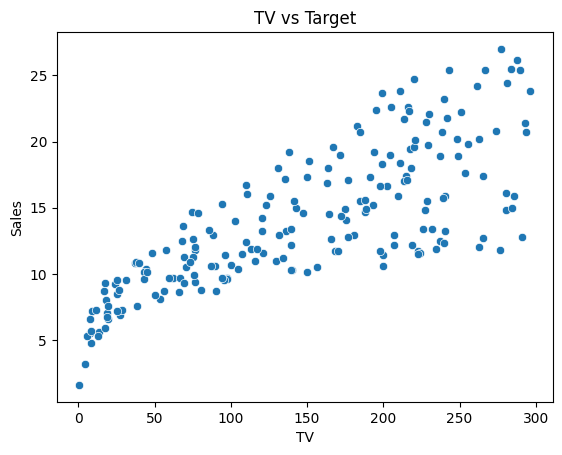

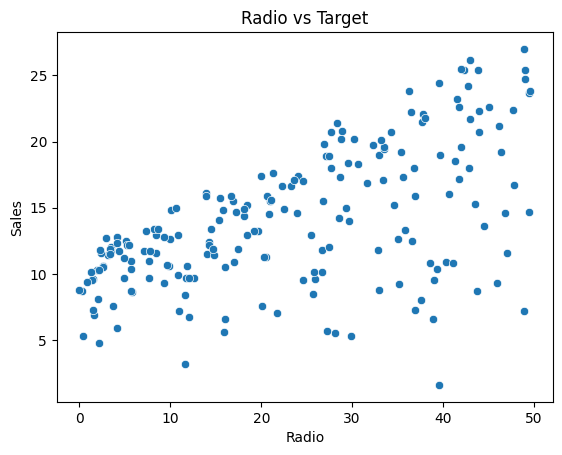

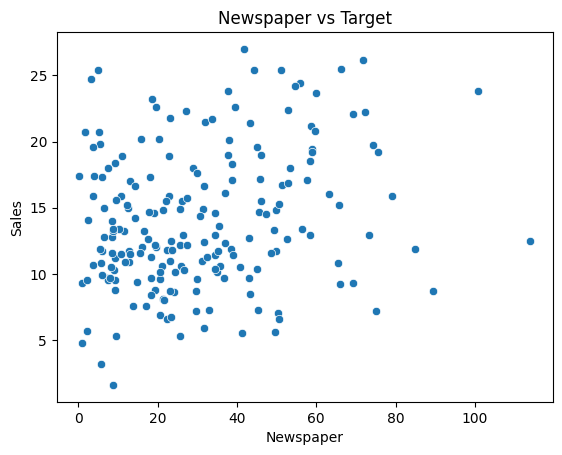

In [25]:
import seaborn as sns 
import matplotlib.pyplot as plt
for col in X.columns:
    plt.figure()
    sns.scatterplot(x=df[col], y=y)
    plt.title(f"{col} vs Target")
    plt.show()


TV against Sales:
The scatter plot shows a clear upward trend, meaning that as TV advertising expenditure increases, sales tend to increase as well. Since strong tightly clustered towards upward direction shows it has strong correlation

Radio Against Sales:
The plots shows positive trend but the points are spread out compared to TV. with moderate correlation Radio does influence the sales but relationship in less tight

Newspaper against Sales:
The plots shows no pattern or trend so indicating weak correlation or inconsistent relationship


#### 2.3 Separate the target feature, split data in 2:1 proportion (33% form a holdout set, use random_state=17), and preprocess data with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# features and target separated
X = df.drop("Sales", axis=1)
y = df["Sales"]

# Split data in 2:1 proportion (33%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=17
)

# Preprocess with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### 2.4 Fit linear regression model, generate predictions and print regression coefficients $b_0$ and $b_1$.

In [ ]:
from sklearn.linear_model import LinearRegression

#  model selection
model = LinearRegression()

# Fit the model
model.fit(X_train_scaled, y_train)

# predictions on the test set
y_pred = model.predict(X_test_scaled)

# Print regression coefficients
print("Intercept (b0):", model.intercept_)
print("Coefficients (b1...):", model.coef_)



Intercept (b0): 14.022388059701495
Coefficients (b1...): [ 3.9675339   2.88155345 -0.07344038]


In [36]:
# Evaluate on test set
test_mae = mean_abs_error(y_test, y_pred)
test_mse = mean_sqr_error(y_test, y_pred)
test_rmse = root_mean_sqr_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("Test MAE:", test_mae)
print("Test MSE:", test_mse)
print("Test RSME:", test_rmse)
print("Test R²:", test_r2)


Test MAE: 1.241490259650847
Test MSE: 3.47262996875279
Test RSME: [1.611418   2.09650266 3.25278107 0.17499898 0.0434687  1.02133364
 3.238648   0.08580286 0.20813287 0.08022516 1.71456149 0.55624715
 0.33877548 0.04128564 2.08501193 1.3464485  4.14200316 0.28549252
 0.33633317 0.11098393 0.44901161 2.11513226 0.02753275 0.56679484
 0.90809287 1.27220062 0.88255736 0.7697595  1.09455698 1.18240932
 2.27094275 9.10176245 0.15506045 0.21632605 1.09015668 2.99223442
 0.87529265 1.6008895  1.24270444 0.68836205 1.93423869 0.33786032
 1.78530137 0.16823574 0.84623119 1.0339026  1.40299623 0.26022304
 1.07988563 0.10927683 1.04597076 0.20687719 2.74980699 0.53910417
 0.54024568 1.34335896 4.13497912 1.60663067 0.81827331 2.11461359
 0.24634969 2.00635163 0.07949561 0.05390195 0.94731392 2.27469787]
Test R²: 0.8515370160992792


#### 2.5 Evaluate created model with above functions

In [35]:
y_train_pred = model.predict(X_train_scaled)

train_mae = mean_abs_error(y_train, y_train_pred)
train_mse = mean_sqr_error(y_train, y_train_pred)
train_rmse = root_mean_sqr_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Train MAE:", train_mae)
print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train R²:", train_r2)


Train MAE: 1.2321941960634573
Train MSE: 2.4617724081938803
Train RMSE: [0.42047011 1.78298621 2.29217575 0.93142871 1.1793918  1.204473
 1.13608435 0.13063799 0.31130296 0.16789214 2.32397923 2.17617324
 1.28724237 0.83897171 5.41686674 0.84418472 1.43980307 1.27173048
 0.23723757 1.84140683 2.79760906 0.72027385 0.48480781 0.8879033
 1.29830223 2.36002089 0.32567973 2.20713941 0.02068027 0.36369682
 0.63888985 1.94896646 1.25676533 1.04599735 3.74976579 1.80768315
 1.62049797 0.1041186  0.13889942 2.08004981 0.9640577  1.87784563
 0.26561072 0.19965873 0.22203885 0.96090567 2.09246644 0.71283036
 1.15503027 1.20864886 2.13019492 1.27151593 1.43576794 0.54336215
 1.06944115 4.16437992 1.04931707 1.67902641 1.30654964 0.01592673
 1.39308397 0.30375526 0.13139446 1.38345739 1.51250334 0.17081011
 0.16058426 2.23480281 0.39739345 2.07451046 0.36868764 0.34577846
 1.54632447 3.55768507 1.48098195 2.20118411 0.2959589  2.66856172
 0.04110216 2.13129711 0.45048054 1.87791146 1.51939252 2.75

#### 2.6 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

Please use [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
with [r2](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules) score.

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Perform 10-fold cross-validation using R² score
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='r2')

print("Cross-validation R² scores:", cv_scores)
print("Mean R² score:", cv_scores.mean())


Cross-validation R² scores: [0.95167662 0.86776129 0.92327432 0.85257085 0.9089784  0.86938345
 0.91258865 0.81872442 0.92976358 0.94797723]
Mean R² score: 0.8982698791408206


The mean R² score provides an overall measure of model performance and generalization ability
higher mean R²(0.89) indicates that the model explains a substantial portion of the variance in sales and is stable across folds

#### 2.7. Drop one of the three variables (TV, Radio or Newspaper) and create another model, evaluate it and compare to the first model.

In [40]:
# Drop one feature (example: Newspaper)
X_reduced = df.drop(["Sales", "Newspaper"], axis=1)
y = df["Sales"]

# Split again
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reduced, y, test_size=0.33, random_state=17
)

# Scale again
scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)

# Fit new model
model_r = LinearRegression()
model_r.fit(X_train_r_scaled, y_train_r)

# Predictions
y_pred_r = model_r.predict(X_test_r_scaled)

# Evaluate
mae_r = mean_abs_error(y_test_r, y_pred_r)
mse_r = mean_sqr_error(y_test_r, y_pred_r)
rmse_r = root_mean_sqr_error(y_test_r, y_pred_r)
r2_r = r2_score(y_test_r, y_pred_r)

print("Reduced Model MAE:", mae_r)
print("Reduced Model MSE:", mse_r)
print("Reduced Model RMSE:", rmse_r)
print("Reduced Model R²:", r2_r)


Reduced Model MAE: 1.2423619953941778
Reduced Model MSE: 3.458740998763223
Reduced Model RMSE: [1.50798177 2.03346552 3.29399695 0.2319585  0.02475213 1.00574589
 3.4229717  0.03717053 0.23742221 0.07211893 1.69611708 0.49430283
 0.30743452 0.14546216 2.08561078 1.30504463 4.19940611 0.56101062
 0.24699069 0.0701732  0.48362731 2.15125515 0.12898821 0.49404017
 0.96123464 1.31969345 0.90093427 0.82550285 1.1447     1.11859691
 2.31055211 9.01326046 0.15133166 0.14483216 1.10912836 2.8982276
 0.91014626 1.51579716 1.31413656 0.69177076 1.92514084 0.38060755
 1.72109092 0.23169001 0.77793829 0.91968787 1.47180626 0.18480543
 1.05204428 0.14112721 0.99828711 0.24939784 2.65559525 0.4956679
 0.58529368 1.40594885 4.12802338 1.52483493 0.81595576 2.13635393
 0.3104041  1.97589983 0.06406811 0.03571229 0.82565086 2.41596641]
Reduced Model R²: 0.8521308017736854


The R² score changed only slightly, showing that removing Newspaper does not significantly reduce model accuracy. Indicated Newspaper variable is not an important feature for predicting sales

### 3. Use regularization models with regularization strength `alpha=1` and compare $MSE$ values with previous models.

#### 3.1 Lasso regression

In [43]:
from sklearn.linear_model import Lasso

# alpha = 1
lasso = Lasso(alpha=1)

lasso.fit(X_train_scaled, y_train)

# Predict test data
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluate using functions
lasso_mse = mean_sqr_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("Lasso MSE:", lasso_mse)
print("Lasso R²:", lasso_r2)

# Print coefficients
print("Lasso coefficients:", lasso.coef_)
print("Lasso intercept:", lasso.intercept_)


Lasso MSE: 4.911579294712751
Lasso R²: 0.7900185956121483
Lasso coefficients: [3.0619592  1.96202634 0.        ]
Lasso intercept: 14.022388059701495


#### 3.2 Ridge regression

In [44]:
from sklearn.linear_model import Ridge

# Initialize Ridge with alpha = 1
ridge = Ridge(alpha=1)

# Fit on scaled training data
ridge.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluate using your custom functions
ridge_mse = mean_sqr_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge MSE:", ridge_mse)
print("Ridge R²:", ridge_r2)

# Print coefficients
print("Ridge coefficients:", ridge.coef_)
print("Ridge intercept:", ridge.intercept_)


Ridge MSE: 3.4768894774722394
Ridge R²: 0.8513549122240807
Ridge coefficients: [ 3.93899368  2.85996406 -0.06218255]
Ridge intercept: 14.022388059701495


#### 3.3 Elastic net regression

Use any `l1_ratio` of your choice.


In [45]:
from sklearn.linear_model import ElasticNet

# Initialize Elastic Net with alpha = 1 and any l1_ratio
elastic = ElasticNet(alpha=1, l1_ratio=0.5)

elastic.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_elastic = elastic.predict(X_test_scaled)

# Evaluate using your custom functions
elastic_mse = mean_sqr_error(y_test, y_pred_elastic)
elastic_r2 = r2_score(y_test, y_pred_elastic)

print("Elastic Net MSE:", elastic_mse)
print("Elastic Net R²:", elastic_r2)

# Print coefficients
print("Elastic Net coefficients:", elastic.coef_)
print("Elastic Net intercept:", elastic.intercept_)


Elastic Net MSE: 6.8438833201041085
Elastic Net R²: 0.7074081176763123
Elastic Net coefficients: [2.39397459 1.68907463 0.01489489]
Elastic Net intercept: 14.022388059701493


#### 3.4 Make conclusions

Ridge regression clearly delivers the best performance. It achieves the lowest MSE (3.48) and the highest R² (0.85), meaning it explains more variance in Sales and produces more accurate predictions than both Lasso and Elastic Net

Lasso regression performs reasonably well, with an MSE of 4.91 and R² of 0.79, but it eliminates the Newspaper variable entirely by shrinking its coefficient to zero

Elastic Net shows the weakest performance among the three, with the highest MSE (6.84) and lowest R² (0.71). Although it combines L1 and L2 penalties, in this dataset it does not outperform the pure Lasso or Ridge approaches.

## Classification models

You will use [Diabetes](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset. The dataset includes data from 768 women with several medical predictor variables and one target variable. The classification goal is to predict whether or not the patients in the dataset have diabetes or not.
#### Your task will be to:
1. Write evaluation functions (Accuracy, Precision, Recall, F1).
2. Predict whether or not a patient has diabetes using Logistic regression and Decision Tree Classification models
3. Evaluate both models with written statistical explanatory variables
4. Draw ROC curve and compute AUC
5. Perform cross-validation (k-fold)
6. Analyze the results

Please use your code and visualization results made in previous day for data preparation and explanatory analysis.

### 1. Write statistical evaluation functions for classification models

#### 1.1 Create a function that calculates accuracy

\begin{equation}
Accuracy = \frac{True Positive + True Negative}{True Positive + True Negative + False Positive + False Negative}
\end{equation}

In [46]:
def accuracy(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn)


#### 1.2 Create a function that calculates precision

\begin{equation}
Precision = \frac{True Positive}{True Positive + False Positive}
\end{equation}

In [47]:
def precision(tp, tn, fp, fn):
    return tp / (tp + fp)

#### 1.3  Create a function that calculates recall

\begin{equation}
Recall = \frac{True Positive}{True Positive + False Negative}
\end{equation}

In [48]:
def recall(tp, tn, fp, fn):
    return tp / (tp + fn)

#### 1.4 Create a function that calculates $F1$ - score

\begin{equation}
F1 = 2\cdot \frac{Precision \cdot Recall}{Precision + Recall}
\end{equation}

In [49]:
def f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)


### 2. Use logistic regression to make prediction and evaluate it with above developed functions. Compute ROC and compute AUC. Perform k-fold cross-validation.

#### 2.1 Read and prepare dataset for modelling. Split the data in target variable and features.

Prepare dataset to use it for modelling (you should also replace 0 values in columns `Glucose`, `BloodPressure`,`SkinThickness`,`Insulin`,`BMI` with mean values).

In [51]:
import pandas as pd

# Load dataset
df = pd.read_csv("diabetes.csv")

# Columns to consider for 0 replace
cols_with_zero_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0 with column mean
for col in cols_with_zero_missing:
    df[col] = df[col].replace(0, df[col].mean())

# Split into features and target
X = df.drop("Outcome", axis=1) 
y = df["Outcome"]

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


#### 2.2. Look at the correlation and visualize the data by methods from day 1 by plots of your choice. Write what you observe.

In [52]:
corr = df.select_dtypes(include=['number']).corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<Figure size 1500x1200 with 0 Axes>

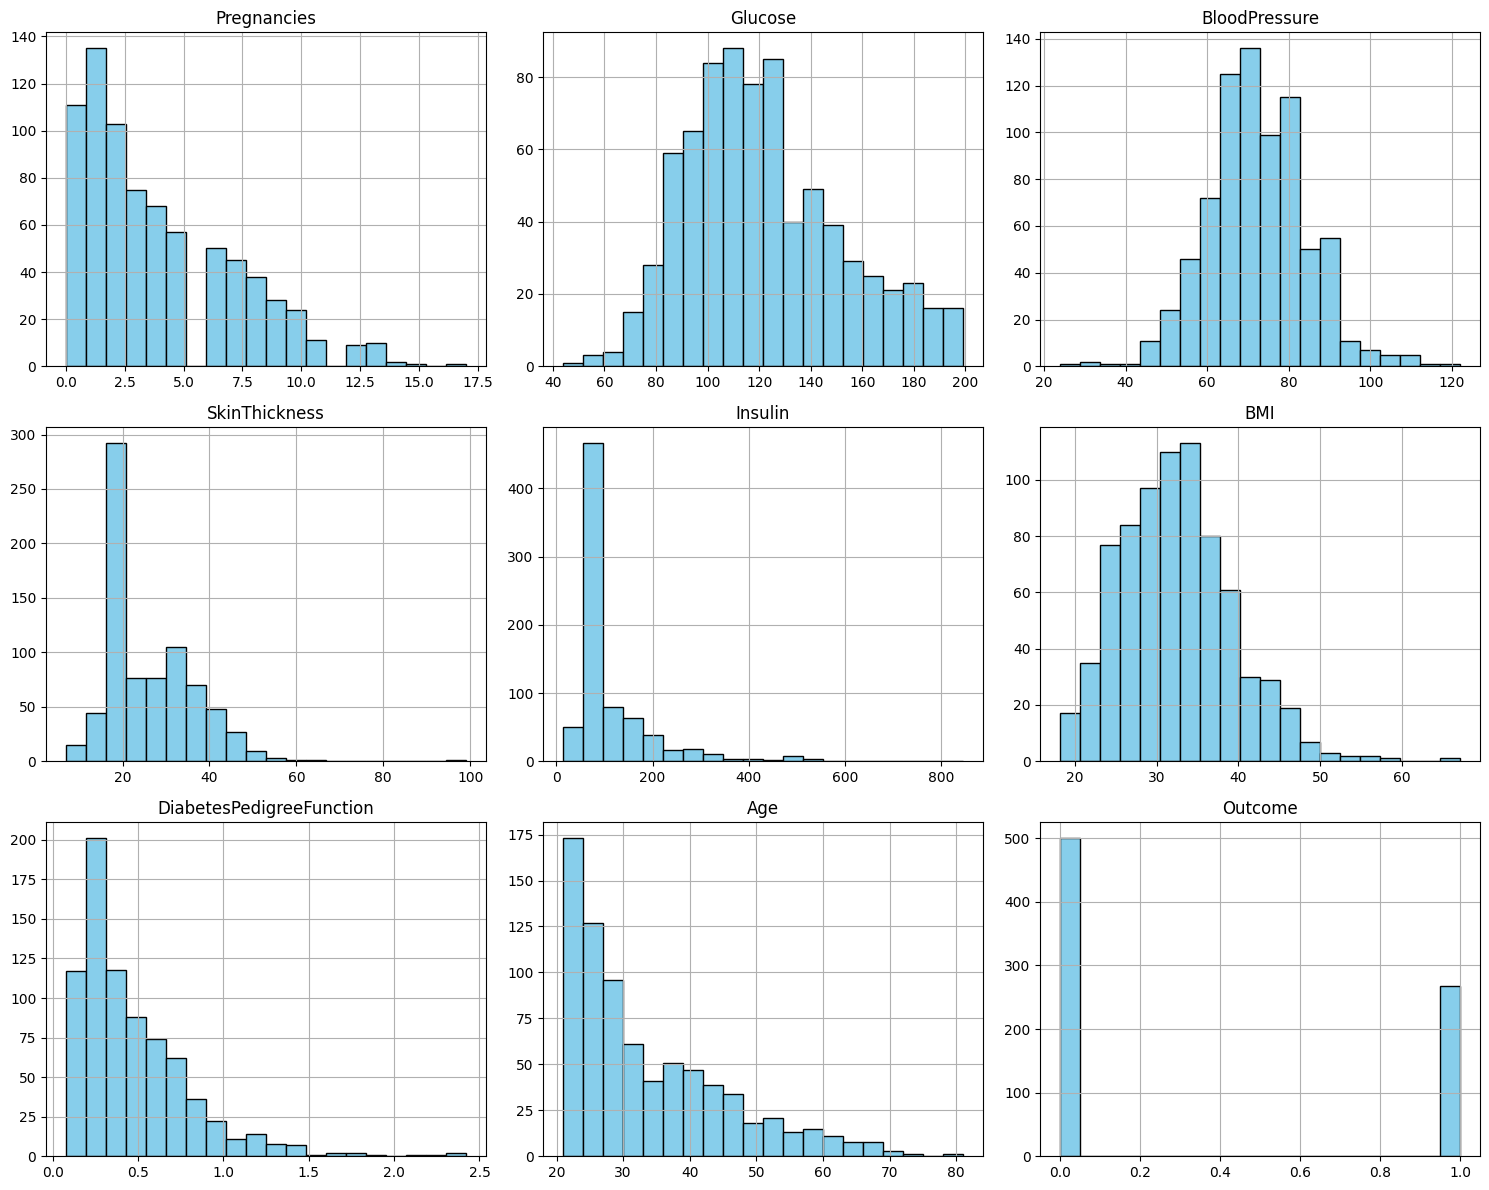

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
df.hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


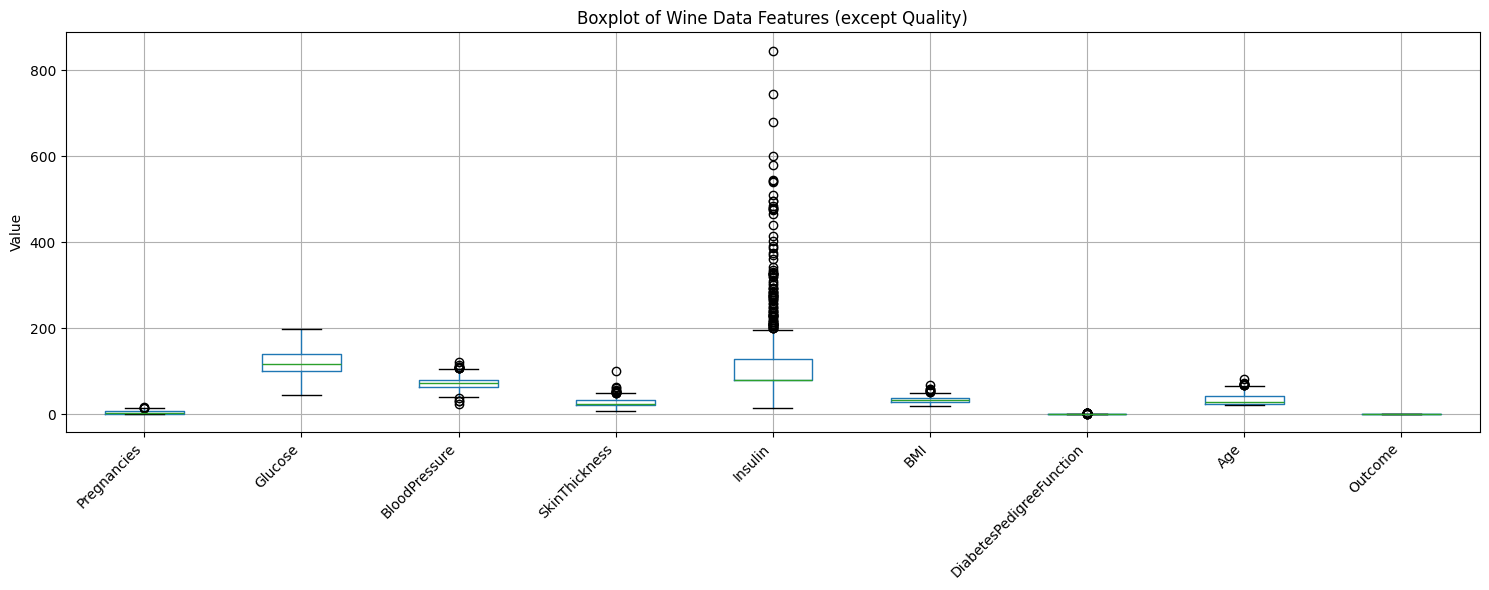

In [ ]:
plt.figure(figsize=(15, 6))
df.boxplot()
plt.title('Boxplot of diabetes Data Features')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

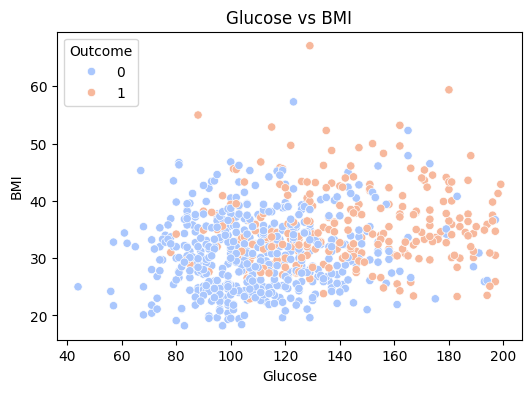

In [58]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='coolwarm')
plt.title('Glucose vs BMI')
plt.show()


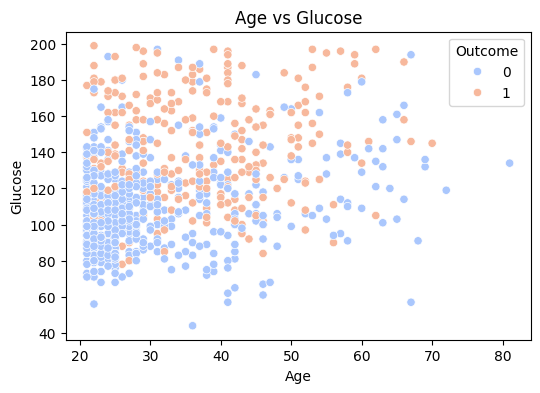

In [59]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df, palette='coolwarm')
plt.title('Age vs Glucose')
plt.show()


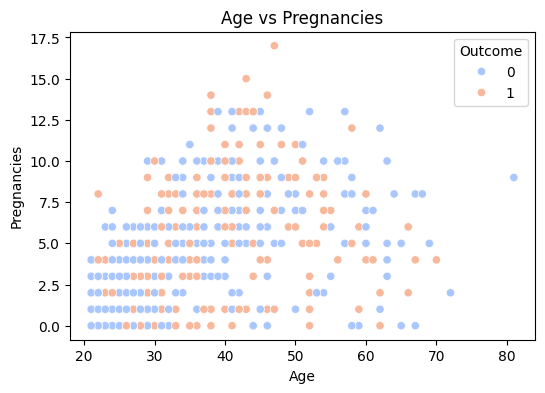

In [60]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Pregnancies', hue='Outcome', data=df, palette='coolwarm')
plt.title('Age vs Pregnancies')
plt.show()


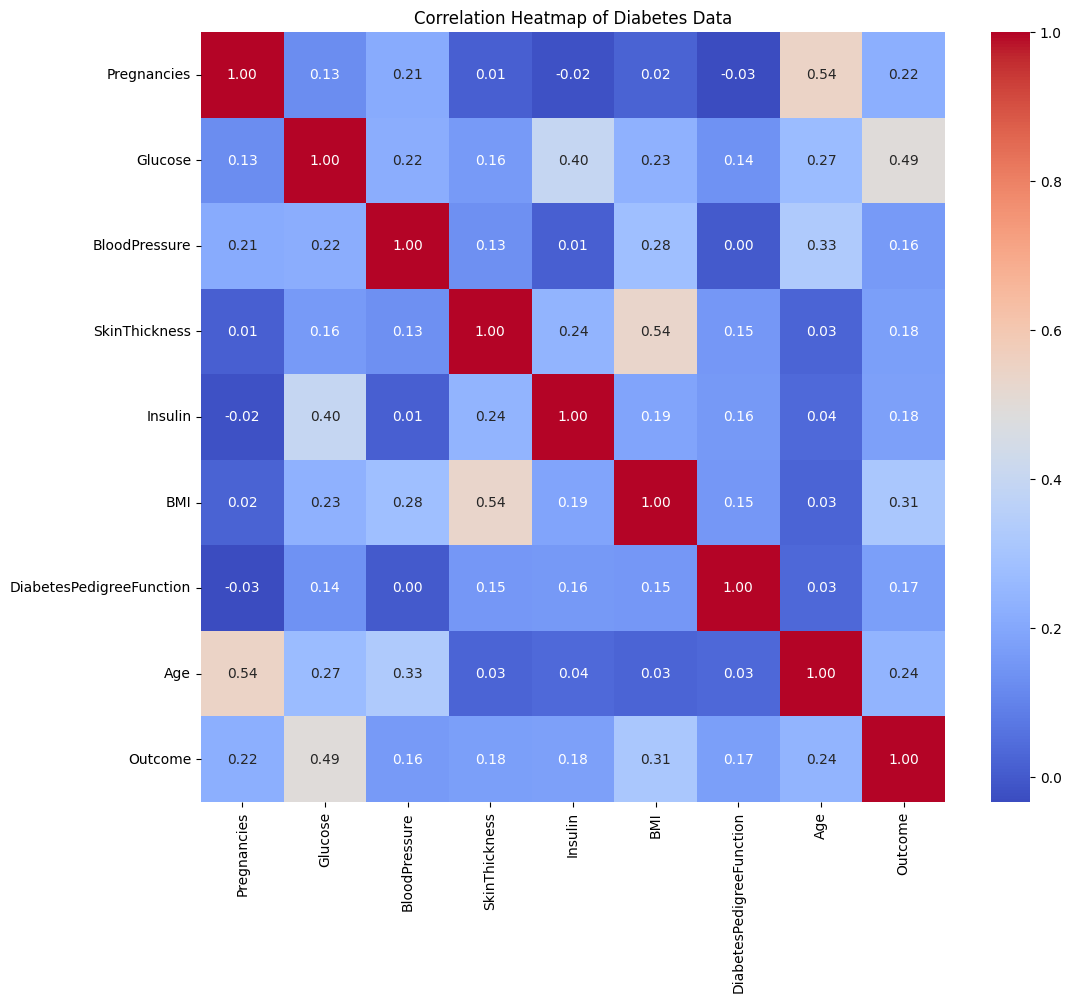

In [53]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Diabetes Data')
plt.show()

Glucose (0.49) — by far the most influential feature. Visualizations such as histograms or boxplots typically show that individuals with higher glucose levels are much more likely to have diabetes.

BMI (0.31) — people with higher BMI values tend to have a higher probability of diabetes.

Age (0.24) — older individuals show a higher likelihood of diabetes.

Pregnancies (0.22) — more pregnancies correlate with increased diabetes risk, likely reflecting age and metabolic stress.


Histograms show that the distribution of Glucose and BMI shifts noticeably higher for diabetic patients.

Boxplots highlight clear separation in Glucose, BMI, and Age between Outcome = 0 and Outcome = 1.

Scatter plots (e.g., Glucose vs BMI) show clusters where high glucose and high BMI coincide with positive diabetes outcomes.

The correlation matrix and visualizations consistently indicate that Glucose, BMI, Age, and Pregnancies are the most important predictors of diabetes. Other features contribute but with weaker individual influence. The visual patterns strongly support the statistical correlations, confirming which variables are most relevant for classification

#### 2.3 Separate the target feature, split data in 2:1 proportion (33% form a holdout set, use random_state=17), and preprocess data with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop("Outcome", axis=1)
y = df["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=17
)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### 2.4 Fit logistic regression model, generate predictions

In [62]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_scaled, y_train)

# predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# predicted probabilities
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Predictions:", y_pred[:10])
print("Predicted probabilities:", y_prob[:10])


Predictions: [0 1 0 0 0 0 0 1 1 1]
Predicted probabilities: [0.05826334 0.71974472 0.13155941 0.03394223 0.27625022 0.46998341
 0.13240453 0.65798498 0.79424233 0.65412037]


#### 2.5 Create a confusion matrix and evaluate created model with above functions

In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)
print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")


Confusion Matrix:
[[146  19]
 [ 41  48]]
TP: 48, FP: 19, TN: 146, FN: 41


#### 2.6 Draw a ROC curve and compute Area Under the Curve (AUC)

You can use [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) and [from_estimator](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html#sklearn.metrics.RocCurveDisplay.from_predictions).
Check documentation for examples.
For roc_auc_score use predicted probabilities (`predict_proba`), not predicted values. This will align your AUC and ROC curve values.

`predict_proba()` method returns a two-dimensional array. For each instance the predicted class is the class with the maximum probability. So one simple way to get the estimated probabilities for the predicted classes is to use `np.max()`

In [65]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# Get probability of class 1 
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]


In [66]:
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)


AUC: 0.8332311882873681


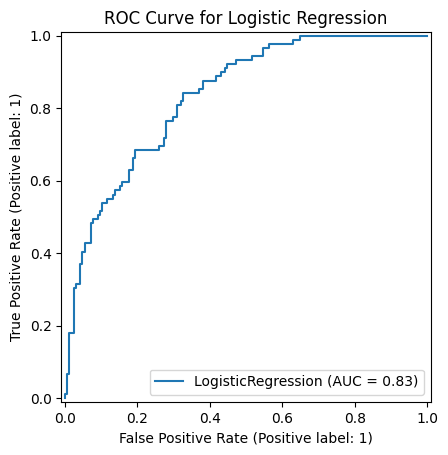

In [67]:
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.title("ROC Curve for Logistic Regression")
plt.show()


#### 2.7 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

Use [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)
with [accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules). Feed you scaled X train and y train data.

In [68]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation on the training set
cv_scores = cross_val_score(
    log_reg, 
    X_train_scaled, 
    y_train, 
    cv=10, 
    scoring='accuracy'
)

print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation accuracies: [0.67307692 0.82692308 0.78846154 0.75       0.70588235 0.76470588
 0.88235294 0.74509804 0.74509804 0.80392157]
Mean CV accuracy: 0.768552036199095


### 3. Use Decision tree classification model to make predictions and evaluate it with above developed functions. Draw ROC curve and compute AUC. Perform k-fold cross-validation.

#### 3.1 Create classification tree object, fit model and generate predictions

In [69]:
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree classifier
dt = DecisionTreeClassifier(random_state=17)


dt.fit(X_train_scaled, y_train)


y_pred_dt = dt.predict(X_test_scaled)

# Predicted probabilities for ROC/AUC
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

print("Decision Tree Predictions:", y_pred_dt[:10])
print("Decision Tree Probabilities:", y_prob_dt[:10])


Decision Tree Predictions: [0 1 0 0 0 1 0 1 1 1]
Decision Tree Probabilities: [0. 1. 0. 0. 0. 1. 0. 1. 1. 1.]


#### 3.2 Evaluate created model with above functions

In [70]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()

print("Decision Tree Confusion Matrix:")
print(cm_dt)
print(f"TP: {tp_dt}, FP: {fp_dt}, TN: {tn_dt}, FN: {fn_dt}")


Decision Tree Confusion Matrix:
[[128  37]
 [ 26  63]]
TP: 63, FP: 37, TN: 128, FN: 26


In [73]:
# Accuracy
acc_dt = accuracy(tp_dt, tn_dt, fp_dt, fn_dt)

# Precision
prec_dt = precision(tp_dt, tn_dt, fp_dt, fn_dt)

# Recall
rec_dt = tp_dt / (tp_dt + fn_dt)

# F1-score
f1_dt = f1_score(prec_dt, rec_dt)

print("Decision Tree Accuracy:", acc_dt)
print("Decision Tree Precision:", prec_dt)
print("Decision Tree Recall:", rec_dt)
print("Decision Tree F1-score:", f1_dt)


Decision Tree Accuracy: 0.7519685039370079
Decision Tree Precision: 0.63
Decision Tree Recall: 0.7078651685393258
Decision Tree F1-score: 0.6666666666666666


#### 3.3 Draw a ROC curve and compute Area Under the Curve (AUC)

In [74]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

# AUC for Decision Tree
auc_dt = roc_auc_score(y_test, y_prob_dt)
print("Decision Tree AUC:", auc_dt)


Decision Tree AUC: 0.7418113721484507


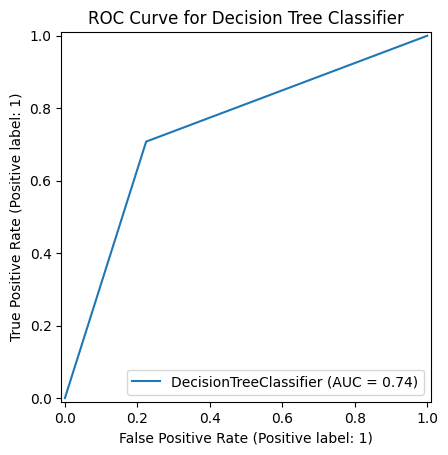

In [75]:
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(dt, X_test_scaled, y_test)
plt.title("ROC Curve for Decision Tree Classifier")
plt.show()


#### 3.4 Perform k-fold cross-validation $(k=10)$ and print the mean accuracy to get an overall performance metric.

In [76]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation on the training set
cv_scores_dt = cross_val_score(
    dt,
    X_train_scaled,
    y_train,
    cv=10,
    scoring='accuracy'
)

print("Decision Tree CV Accuracies:", cv_scores_dt)
print("Decision Tree Mean CV Accuracy:", cv_scores_dt.mean())


Decision Tree CV Accuracies: [0.61538462 0.73076923 0.69230769 0.71153846 0.64705882 0.66666667
 0.88235294 0.68627451 0.68627451 0.76470588]
Decision Tree Mean CV Accuracy: 0.7083333333333334


#### 3.5 Make conclusions

Model Performance: 
Accuracy - 0.752 , The model correctly classifies about 75% of the test samples
Precision: 0.63 , When the model predicts diabetes, it is correct 63% of the time
Recall: 0.708 , The model successfully identifies about 71% of actual diabetic cases
F1‑score: 0.667 , The balance between precision and recall is moderate

TP = 63: Correctly predicted diabetic cases
TN = 128: Correctly predicted non‑diabetic cases
FP = 37: Non‑diabetic cases incorrectly predicted as diabetic
FN = 26: Missed diabetic cases

An AUC of ~0.74 indicates fair discrimination ability

The Decision Tree classifier performs reasonably well, especially in terms of recall, meaning it captures most diabetic cases. However, its lower precision and variability across folds indicate that the model is prone to overfitting and produces a notable number of false positives. AUC score confirms only moderate discriminative power.

Overall, while the decision tree is interpretable and captures patterns in the data, it does not outperform more stable models like logistic regression and may require pruning or tuning to improve generalization.